# **Team Project Part 2**
## Enhanced Visual Representation

### Group#24 
#### Team Members 
- Shiraz Latif
- Jessilynn Kim
- Mykhailo Vitvinov
- Olena Bolokhonova


In [13]:
# Import necessary libraries for data manipulation, analysis, and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Import libraries for machine learning models and evaluation metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Import additional statistical and modeling tools
import statsmodels.api as sm
from scipy import stats

# Import specific modules from ISLP for data handling and modeling
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from ISLP import confusion_table

# Import OS for file handling
import os

In [16]:
# Suppress warnings for cleaner output
import warnings 
warnings.filterwarnings('ignore')  # Mute warning messages

In [9]:
# Load the dataset into a pandas DataFrame
cust_data = pd.read_csv ('./data/raw/shopping_trends.csv')

# Display the first few rows of the dataset to get an initial look at the data
cust_data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [11]:
# Load the dataset into a pandas DataFrame
cust_data = pd.read_csv('./data/raw/shopping_trends.csv')
# Display the first few rows of the dataset to get an initial look at the data
cust_data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


### Visualizations: Average Purchase Amount by Age

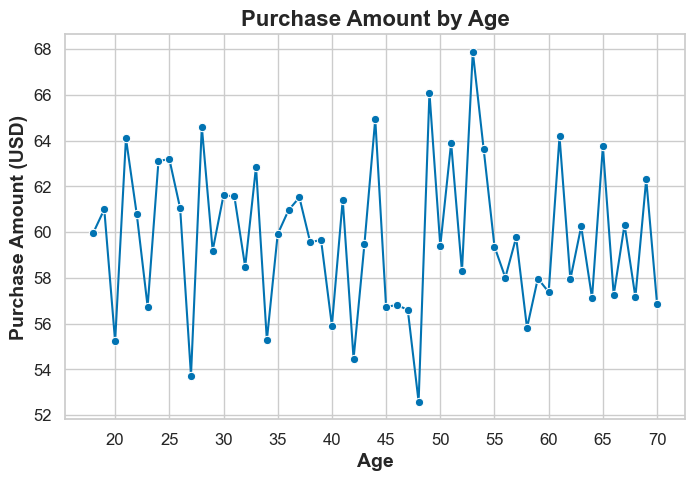

In [46]:
# Sort the data by 'Age'
cust_data = cust_data.sort_values(by='Age')

# Set the color palette to colorblind-friendly
sns.set_palette("colorblind")

# Create a line graph using Seaborn
plt.figure(figsize=(8, 5))  # Reasonable size for readability
sns.lineplot(data=cust_data, x='Age', y='Purchase Amount (USD)', marker='o', ci=None)

# Increase the font sizes for better readability
plt.title('Purchase Amount by Age', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14, fontweight='bold')
plt.ylabel('Purchase Amount (USD)', fontsize=14, fontweight='bold')
plt.xticks(ticks=range(20, 71, 5), fontsize=12)  # Adjust x-axis tick intervals
plt.yticks(fontsize=12)  # Adjust y-axis font size
plt.grid(True)

# Show the plot
plt.show()

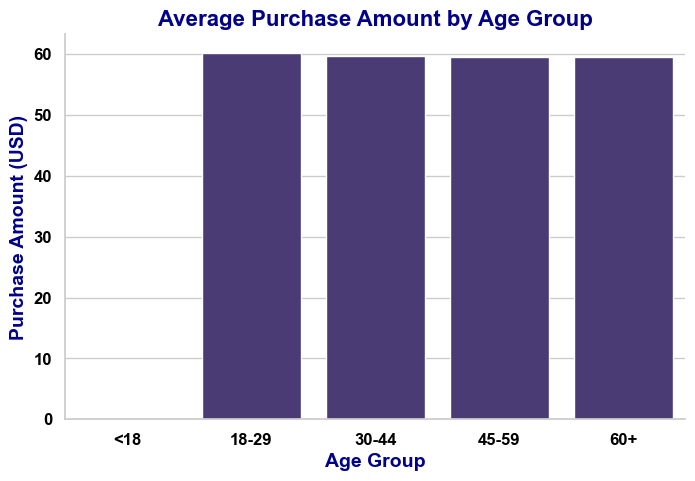

In [43]:
# Load the dataset into a pandas DataFrame
cust_data = pd.read_csv('./data/raw/shopping_trends.csv')

# Define the age bins and labels
age_bins = [0, 18, 30, 45, 60, 100]
age_labels = ['<18', '18-29', '30-44', '45-59', '60+']

# Create the Age Group column
cust_data['Age Group'] = pd.cut(cust_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Set the style
sns.set(style="whitegrid")

# Choose a color palette
sns.set_palette("viridis")

# Create a bar plot with the chosen palette
plt.figure(figsize=(8, 5))  # Reasonable size for readability
sns.barplot(data=cust_data, x='Age Group', y='Purchase Amount (USD)', ci=None)

# Customize the fonts and add bold styling
plt.title('Average Purchase Amount by Age Group', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Age Group', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Purchase Amount (USD)', fontsize=14, fontweight='bold', color='darkblue')
plt.xticks(fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')

# Remove the top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.show()

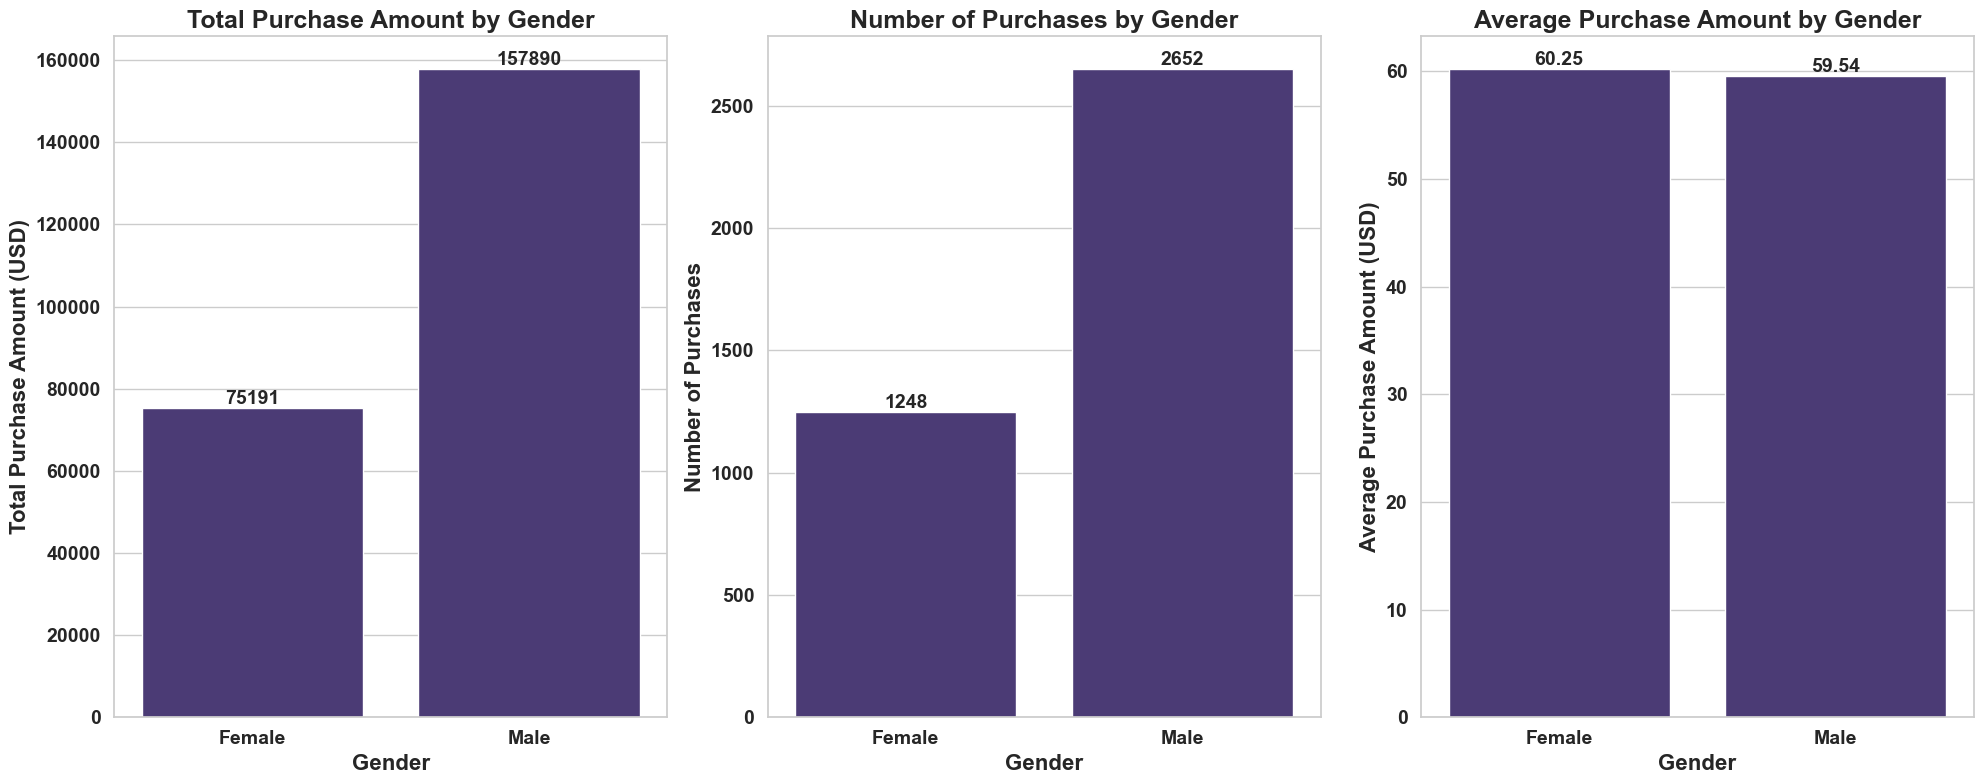

In [45]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by gender and calculate the sum, count, and mean of purchase amounts
gender_purchase_data = cust_data.groupby('Gender')['Purchase Amount (USD)'].agg(['sum', 'count', 'mean']).reset_index()

# Set the modern style and color palette
sns.set(style="whitegrid", palette="viridis")

# Increase the overall size of the figure
plt.figure(figsize=(20, 8))

# Plot the total purchase amount by gender with better readability
plt.subplot(1, 3, 1)
sns.barplot(data=gender_purchase_data, x='Gender', y='sum')
plt.title('Total Purchase Amount by Gender', fontsize=18, fontweight='bold')
plt.xlabel('Gender', fontsize=16, fontweight='bold')
plt.ylabel('Total Purchase Amount (USD)', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
# Add value labels
for index, value in enumerate(gender_purchase_data['sum']):
    plt.text(index, value, f'{value:.0f}', ha='center', va='bottom', fontsize=14, fontweight='bold')

# Plot the count of purchases by gender with better readability
plt.subplot(1, 3, 2)
sns.barplot(data=gender_purchase_data, x='Gender', y='count')
plt.title('Number of Purchases by Gender', fontsize=18, fontweight='bold')
plt.xlabel('Gender', fontsize=16, fontweight='bold')
plt.ylabel('Number of Purchases', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
# Add value labels
for index, value in enumerate(gender_purchase_data['count']):
    plt.text(index, value, f'{value:.0f}', ha='center', va='bottom', fontsize=14, fontweight='bold')

# Plot the average purchase amount by gender with better readability
plt.subplot(1, 3, 3)
sns.barplot(data=gender_purchase_data, x='Gender', y='mean')
plt.title('Average Purchase Amount by Gender', fontsize=18, fontweight='bold')
plt.xlabel('Gender', fontsize=16, fontweight='bold')
plt.ylabel('Average Purchase Amount (USD)', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
# Add value labels
for index, value in enumerate(gender_purchase_data['mean']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=14, fontweight='bold')

# Adjust the layout for better readability
plt.tight_layout()

# Show the plots
plt.show()
